In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
config_file="/content/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model ="/content/frozen_inference_graph.pb"

In [ ]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

SystemError: <class 'cv2.dnn.DetectionModel'> returned a result with an exception set

In [ ]:
classLabels = []
file_name="/content/labels.txt"
with open(file_name,'rt') as fpt:
  classLabels = fpt.read().rstrip('\n').split('\n')

In [ ]:
print(classLabels)
# print(len(classLabels))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x7821a8977a70>

In [ ]:
img = cv2.imread("/content/boy.webp")
plt.imshow(img)

In [ ]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold = 0.5)

In [ ]:
print(ClassIndex)

[1 4 3]


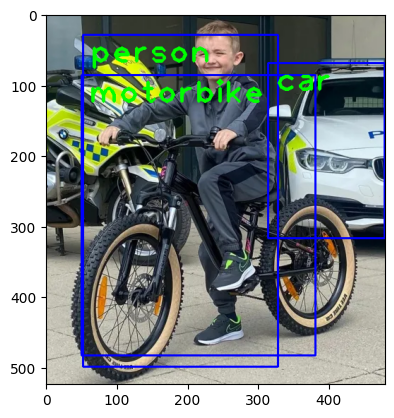

In [ ]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
  cv2.rectangle(img, boxes, (255,0,0),2)
  cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10,boxes[1]+40), font, fontScale = font_scale, color=(0,255,0), thickness=3)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [ ]:
#Video

cap = cv2.VideoCapture("/content/pexels-george-morina-5266804 (2160p).mp4")

if not cap.isOpened():
  cap = cv2.VideoCapture(0)
if not cap.isOpened():
  raise IOError("Cant open the video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
  ret, frame= cap.read()

  ClassIndex, confidece, bbox = model.detect(frame, confThreshold = 0.55)

  print(ClassIndex)

  if(len(ClassIndex)!=0):
    for ClassInd,conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
       if(ClassInd<=80):
           cv2.rectangle(img, boxes, (255,0,0),2)
           cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10,boxes[1]+40), font, fontScale = font_scale, color=(0,255,0), thickness=3)
  cv2.imshow('objectdetection by Tazdik', frame)

  if cv2.waitKey() & 0xff == ord('q'):
    break

cap.release()
cv2.destroyaLLWindows()

In [ ]:
#Webcam

cap = cv2.VideoCapture(1)

if not cap.isOpened():
  cap = cv2.VideoCapture(0)
if not cap.isOpened():
  raise IOError("Cant open the video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
  ret, frame= cap.read()

  ClassIndex, confidece, bbox = model.detect(frame, confThreshold = 0.55)

  print(ClassIndex)

  if(len(ClassIndex)!=0):
    for ClassInd,conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
       if(ClassInd<=80):
           cv2.rectangle(img, boxes, (255,0,0),2)
           cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10,boxes[1]+40), font, fontScale = font_scale, color=(0,255,0), thickness=3)
  cv2.imshow('objectdetection by Tazdik', frame)

  if cv2.waitKey() & 0xff == ord('q'):
    break

cap.release()
cv2.destroyaLLWindows()

OSError: Cant open the video

In [ ]:
git remote add origin https://github.com/tazdikhossain/Object-Detection-OpenCV.git
git branch -M main
git push -u origin main

SyntaxError: invalid syntax (<ipython-input-1-ea13a8be865e>, line 1)